In [65]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

from statsmodels.stats.proportion import proportions_ztest

In [24]:
df_raw= pd.read_csv("HR_RAW_DATA.csv")
df_raw.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [25]:
# Dataset HR_RAW_DATA
print(f"\nInformación del 1º dataset")
print("-----------------------------------")
print(df_raw.info())
print("-----------------------------------")
print(f"\nNombre de las columnas:")
print(df_raw.columns)
print("-----------------------------------")
print(f"\nEstructura datos:")
print(df_raw.shape)
print("------------------------------------")
print(f"\nParámetros estadísticos básicos:")
print(df_raw.describe().T)
print("-----------------------------------")
print(f"\nEl tipo de datos:")
print(df_raw.dtypes)


Información del 1º dataset
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13 

In [4]:
# Homogeneizamos las columnas Renombramos las columnas.
renombradas_hr_raw_data= {columna:columna.lower().replace('','') for columna in df_raw.columns}
# Usamos un diccionario con los nombres de columnas modificados para renombrar las columnas del DataFrame
df_raw.rename(columns = renombradas_hr_raw_data, inplace = True)
# Comprobamos que el diccionario se haya creado correctamente.
renombradas_hr_raw_data

{'Unnamed: 0': 'unnamed: 0',
 'Age': 'age',
 'Attrition': 'attrition',
 'BusinessTravel': 'businesstravel',
 'DailyRate': 'dailyrate',
 'Department': 'department',
 'DistanceFromHome': 'distancefromhome',
 'Education': 'education',
 'EducationField': 'educationfield',
 'employeecount': 'employeecount',
 'employeenumber': 'employeenumber',
 'EnvironmentSatisfaction': 'environmentsatisfaction',
 'Gender': 'gender',
 'HourlyRate': 'hourlyrate',
 'JobInvolvement': 'jobinvolvement',
 'JobLevel': 'joblevel',
 'JobRole': 'jobrole',
 'JobSatisfaction': 'jobsatisfaction',
 'MaritalStatus': 'maritalstatus',
 'MonthlyIncome': 'monthlyincome',
 'MonthlyRate': 'monthlyrate',
 'NUMCOMPANIESWORKED': 'numcompaniesworked',
 'Over18': 'over18',
 'OverTime': 'overtime',
 'PercentSalaryHike': 'percentsalaryhike',
 'PerformanceRating': 'performancerating',
 'RelationshipSatisfaction': 'relationshipsatisfaction',
 'StandardHours': 'standardhours',
 'StockOptionLevel': 'stockoptionlevel',
 'TOTALWORKINGYEARS

In [5]:
def renombrar_columnas(df_raw):
    # Mostramos los nombres de las columnas
    print(df_raw.columns)
    # Renombramos a minúsculas
    df_raw.columns = df_raw.columns.str.lower()
    # Reemplazamos espacios y caracteres especiales por guiones bajos
    df_raw.rename(columns=lambda x: x.replace(' ', '_')
                          .replace('-', '_')
                          .replace('dailyrate', 'daily_rate')
                          .replace('distancefromhome', 'distance_from_home')
                          .replace('educationfield', 'education_field')
                          .replace('employeecount', 'employee_count')
                          .replace('employeenumber', 'employee_number')
                          .replace('environmentsatisfaction', 'environment_satisfaction')
                          .replace('hourlyrate', 'hourly_rate')
                          .replace('jobinvolvement', 'job_involvement')
                          .replace('joblevel', 'job_level')
                          .replace('jobsatisfaction', 'job_satisfaction')
                          .replace('monthlyincome', 'monthly_income')
                          .replace('monthlyrate', 'monthly_rate')
                          .replace('numcompaniesworked', 'num_companies_worked')
                          .replace('percentsalaryhike', 'percent_salary_hike')
                          .replace('performancerating', 'performance_rating')
                          .replace('relationshipsatisfaction', 'relationship_satisfaction')
                          .replace('standardhours', 'standard_hours')
                          .replace('stockoptionlevel', 'stock_option_level')
                          .replace('totalworkingyears', 'total_working_years')
                          .replace('trainingtimeslastyear', 'training_times_last_year')
                          .replace('worklifebalance', 'work_life_balance')
                          .replace('yearsatcompany', 'years_at_company')
                          .replace('yearsincurrentrole', 'years_in_current_role')
                          .replace('yearssincelastpromotion', 'years_since_last_promotion')
                          .replace('yearswithcurrmanager', 'years_with_curr_manager')
                          .replace('sameasmonthlyincome', 'same_as_monthly_income')
                          .replace('datebirth', 'date_birth')
                          .replace('roledepartament', 'role_departament')
                          .replace('numberchildren', 'number_children')
                          .replace('remotework', 'remote_work'), inplace=True)
    # Mostramos los nombres de las columnas
    print(df_raw.columns)
    return df_raw
# Llamamos a la función
df_renombradas= renombrar_columnas(df_raw)
df_renombradas.columns

Index(['unnamed: 0', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary', 'roledepartament',
       'numberchildren', 'remotework'],
      dtype='object')
Index(['unnamed:_0', 'age', 'attrition', 'businesstravel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee

Index(['unnamed:_0', 'age', 'attrition', 'businesstravel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'jobrole',
       'job_satisfaction', 'maritalstatus', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'sameasmonthly_income', 'date_birth', 'salary', 'role_departament',
       'number_children', 'remote_work'],
      dtype='object')

In [6]:
df_raw.to_csv("1_df_columnas_renombradas.csv", index=False)

In [7]:
# Quitamos el simbolo del dolar.
df_raw['daily_rate'] = df_raw['daily_rate'].str.replace('$', '', regex=False).astype(object)
print(f"\nEl resultado de la columna daily_rate sin simbolo dolar:")
df_raw['daily_rate']


El resultado de la columna daily_rate sin simbolo dolar:


0        684,0
1        699,0
2        532,0
3        359,0
4       1319,0
         ...  
1609     530,0
1610     805,0
1611     903,0
1612    1229,0
1613     566,0
Name: daily_rate, Length: 1614, dtype: object

In [8]:
# Convertir todas las filas de la columna "JobRole" a minúsculas
df_raw['jobrole'] = df_raw['jobrole'].str.lower()
print(df_raw)

      unnamed:_0 age attrition businesstravel daily_rate  \
0              0  51        No            NaN      684,0   
1              1  52        No            NaN      699,0   
2              2  42        No  travel_rarely      532,0   
3              3  47        No  travel_rarely      359,0   
4              4  46        No            NaN     1319,0   
...          ...  ..       ...            ...        ...   
1609        1609  36       Yes  travel_rarely      530,0   
1610        1610  45        No     non-travel      805,0   
1611        1611  39        No  travel_rarely      903,0   
1612        1612  36        No     non-travel     1229,0   
1613        1613  46        No            NaN      566,0   

                    department  distance_from_home  education  \
0                          NaN                   6          3   
1                          NaN                   1          4   
2      Research & Development                    4          2   
3                  

In [9]:
df_raw.head()

,unnamed:_0,age,attrition,businesstravel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,jobrole,job_satisfaction,maritalstatus,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,sameasmonthly_income,date_birth,salary,role_departament,number_children,remote_work
0,0,51,No,NaN,"684,0",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,research director,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,manager,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0",NaN,2,4,Medical,1,NaN,1,1,82,3,4,research director,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sales executive,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [10]:
def reemplazar_valores(df_raw):
    # Reemplazamos los valores de la columna Gender (0 y 1 por 'Female' y 'Male')
    if 'gender' in df_raw.columns:
        df_raw['gender'] = df_raw['gender'].replace({0: 'Female', 1: 'Male'})
    
    # Reemplazar las comas por puntos en la columna 'daily_rate', si es necesario
    if 'daily_rate' in df_raw.columns:
        df_raw['daily_rate'] = df_raw['daily_rate'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)
        df_raw['daily_rate'] = pd.to_numeric(df_raw['daily_rate'], errors='coerce')  # Convertir a numérico
        df_raw['total_working_years'] = df_raw['total_working_years'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x)
        df_raw['total_working_years'] = pd.to_numeric(df_raw['total_working_years'], errors='coerce')  # Convertir a numérico
    
    # Evaluar si hay valores duplicados
    duplicados = df_raw.duplicated().sum()
    print(f"\nHay {duplicados} registros duplicados")
    
    # Reemplazar valores negativos en la columna DistanceFromHome por la media
    if 'distance_from_home' in df_raw.columns:
        df_raw['distance_from_home'] = df_raw['distance_from_home'].apply(lambda x: df_raw['distance_from_home'].mean() if x < 0 else x)
    
    # Reemplazar valores faltantes en la columna 'age' por la media
    if 'age' in df_raw.columns:
        df_raw['age'] = pd.to_numeric(df_raw['age'], errors='coerce')  # Convertir a numérico
        df_raw['age'] = df_raw['age'].fillna(df_raw['age'].mean())  # Rellenar con la media
    
    # Reemplazar errores tipográficos en la columna 'marital_status'
    if 'marital_status' in df_raw.columns:
        df_raw['marital_status'] = df_raw['marital_status'].replace({'Marreid': 'Married'})
    
    # Eliminar columnas redundantes
    redundant_columns = ['employee_count', 'standard_hours', 'employee_number']
    df_raw = df_raw.drop(columns=[col for col in redundant_columns if col in df_raw.columns])
    
    # Eliminar columnas con valores constantes
    constant_columns = ['over18', 'sameasmonthly_income']
    df_raw = df_raw.drop(columns=[col for col in constant_columns if col in df_raw.columns])
    
    return df_raw

# Llamamos a la función
df= reemplazar_valores(df_raw)

# Mostramos los primeros registros para verificar los cambios
print(df)



Hay 0 registros duplicados
      unnamed:_0   age attrition businesstravel  daily_rate  \
0              0  51.0        No            NaN       684.0   
1              1  52.0        No            NaN       699.0   
2              2  42.0        No  travel_rarely       532.0   
3              3  47.0        No  travel_rarely       359.0   
4              4  46.0        No            NaN      1319.0   
...          ...   ...       ...            ...         ...   
1609        1609  36.0       Yes  travel_rarely       530.0   
1610        1610  45.0        No     non-travel       805.0   
1611        1611  39.0        No  travel_rarely       903.0   
1612        1612  36.0        No     non-travel      1229.0   
1613        1613  46.0        No            NaN       566.0   

                    department  distance_from_home  education  \
0                          NaN            6.000000          3   
1                          NaN            1.000000          4   
2      Research & De

In [11]:
df.to_csv("2_df_transformacion_datos.csv", index=False)

In [12]:
df.head()

,unnamed:_0,age,attrition,businesstravel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,jobrole,job_satisfaction,maritalstatus,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,date_birth,salary,role_departament,number_children,remote_work
0,0,51.0,No,NaN,684.0,NaN,6.0,3,NaN,1,Female,51,3,5,research director,3,NaN,"19537,0",6462,7,No,13,"3,0",3,0,NaN,5,"3,0",20,NaN,15,15,1972,1000000000$,NaN,NaN,Yes
1,1,52.0,No,NaN,699.0,NaN,1.0,4,Life Sciences,3,Female,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,1,34.0,5,"3,0",33,NaN,11,9,1971,1000000000$,NaN,NaN,1
2,2,42.0,No,travel_rarely,532.0,Research & Development,4.0,2,Technical Degree,3,Female,58,3,5,manager,4,Married,"19232,0",4933,1,No,11,"3,0",4,0,22.0,3,NaN,22,NaN,11,15,1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47.0,No,travel_rarely,359.0,NaN,2.0,4,Medical,1,Male,82,3,4,research director,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,2,NaN,2,NaN,20,NaN,5,6,1976,1000000000$,NaN,NaN,False
4,4,46.0,No,NaN,1319.0,NaN,3.0,3,Technical Degree,1,Male,45,4,4,sales executive,1,Divorced,NaN,7739,2,No,12,"3,0",4,1,NaN,5,"3,0",19,NaN,2,8,1977,1000000000$,NaN,NaN,0


In [13]:
# Identificacion y selecccion de variables con nulos.
def identificar_tratamiento_nulos(df):
    # Calcular el porcentaje de valores nulos.
    nulos = df.isnull().sum() / df.shape[0] * 100
    # Mostrar solo valores nulos
    nulos = nulos[nulos > 0]
    # Ordenar los valores nulos de mayor a menor y redondear a 2 decimales.
    nulos = nulos.sort_values(ascending=False).round(2)
    print(f"\nEl porcentaje de mis variables con nulos es (antes de eliminar columnas):")
    print(nulos)
    # Eliminar las columnas con más del 70% de valores nulos.
    umbral = 70
    columnas_nulas = nulos[nulos > umbral].index
    df = df.drop(columns=columnas_nulas)
    print(f"\nSe han eliminado las columnas con más del {umbral}% de valores nulos")
    # Calcular el porcentaje de valores nulos después de eliminar columnas.
    nulos_despues = df.isnull().sum() / df.shape[0] * 100
    nulos_despues = nulos_despues[nulos_despues > 0]
    nulos_despues = nulos_despues.sort_values(ascending=False).round(2)
    print(f"\nEl porcentaje de mis variables con nulos es (después de eliminar columnas):")
    print(nulos_despues)
    return df
# Llamamos a la función
df = identificar_tratamiento_nulos(df)
# Mostramos los primeros registros para verificar los cambios efectuados.
print(df.head())


El porcentaje de mis variables con nulos es (antes de eliminar columnas):
number_children          100.00
years_in_current_role     97.89
department                81.29
role_departament          81.29
monthly_income            52.23
businesstravel            47.83
education_field           46.16
overtime                  41.88
maritalstatus             40.33
total_working_years       32.59
performance_rating        12.08
daily_rate                 7.68
work_life_balance          6.69
dtype: float64

Se han eliminado las columnas con más del 70% de valores nulos

El porcentaje de mis variables con nulos es (después de eliminar columnas):
monthly_income         52.23
businesstravel         47.83
education_field        46.16
overtime               41.88
maritalstatus          40.33
total_working_years    32.59
performance_rating     12.08
daily_rate              7.68
work_life_balance       6.69
dtype: float64
   unnamed:_0   age attrition businesstravel  daily_rate  distance_from_home 

In [14]:
df_raw.dtypes

unnamed:_0                      int64
age                           float64
attrition                      object
businesstravel                 object
daily_rate                    float64
department                     object
distance_from_home            float64
education                       int64
education_field                object
employee_count                  int64
employee_number                object
environment_satisfaction        int64
gender                         object
hourly_rate                    object
job_involvement                 int64
job_level                       int64
jobrole                        object
job_satisfaction                int64
maritalstatus                  object
monthly_income                 object
monthly_rate                    int64
num_companies_worked            int64
over18                         object
overtime                       object
percent_salary_hike             int64
performance_rating             object
relationship

In [15]:
df.to_csv("3_df_identificar_tratamiento_nulos.csv", index=False)

In [16]:
# Identificar variables categóricas y numéricas
def categoricas_y_numericas (df):
    # Identificar variables categóricas
    categoricas = df.select_dtypes(include=['object']).columns
    print(f"\nVariables categóricas: {categoricas}")
    # Identificar variables numéricas
    numericas = df.select_dtypes(include=['float64', 'int64']).columns
    print(f"\nVariables numéricas: {numericas}")
    return categoricas, numericas
# Llamamos a la función
categoricas, numericas = categoricas_y_numericas(df)


Variables categóricas: Index(['attrition', 'businesstravel', 'education_field', 'gender',
       'hourly_rate', 'jobrole', 'maritalstatus', 'monthly_income', 'overtime',
       'performance_rating', 'work_life_balance', 'salary', 'remote_work'],
      dtype='object')

Variables numéricas: Index(['unnamed:_0', 'age', 'daily_rate', 'distance_from_home', 'education',
       'environment_satisfaction', 'job_involvement', 'job_level',
       'job_satisfaction', 'monthly_rate', 'num_companies_worked',
       'percent_salary_hike', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth'],
      dtype='object')


In [17]:
#Estrategia:
    # Con más de un 40% de nulos.
    ## monthly_income (categorico)       businesstravel()      education_field       overtime            maritalstatus  
    # Con un % bajo nulos.
    ## total_working_years    performance_rating     daily_rate    work_life_balance    

In [18]:
# Imputamos según el porcentaje y el tipo de variable.
def imputar_valores_nulos(df):
    # Imputar valores nulos en variables numéricas
    for col in numericas:
        df[col] = df[col].fillna(df[col].mean())
    # Imputar valores nulos en variables categóricas
    for col in categoricas:
        df[col] = df[col].fillna(df[col].mode()[0])
    # Verificar si hay valores nulos
    nulos_despues = df.isnull().sum().sum()
    print(f"\nTotal de valores nulos después de la imputación: {nulos_despues}")
    return df
# Llamamos a la función
df = imputar_valores_nulos(df)


Total de valores nulos después de la imputación: 0


In [19]:
def calcular_estadistica_descriptiva(df):
    # Inicializar diccionarios para almacenar estadísticas
    estadisticas = {
        "numericas": {},
        "categoricas": {}
    }
    # Variables numéricas
    variables_numericas = df.select_dtypes(include=['float64', 'int64'])
    for col in variables_numericas.columns:
        estadisticas["numericas"][col] = {
            "mean": variables_numericas[col].mean(),
            "std": variables_numericas[col].std(),
            "min": variables_numericas[col].min(),
            "25%": variables_numericas[col].quantile(0.25),
            "50%": variables_numericas[col].median(),
            "75%": variables_numericas[col].quantile(0.75),
            "max": variables_numericas[col].max(),
            "missing_values": variables_numericas[col].isnull().sum()
        }
    
    # Variables categóricas
    variables_categoricas = df.select_dtypes(include=['object', 'category'])
    for col in variables_categoricas.columns:
        estadisticas["categoricas"][col] = variables_categoricas[col].value_counts().to_dict()
        estadisticas["categoricas"][col]["missing_values"] = variables_categoricas[col].isnull().sum()
    return estadisticas

# Llamamos a la función y almacenamos las estadísticas en una variable aparte
estadisticas = calcular_estadistica_descriptiva(df)

# Mostramos las estadísticas generadas
print(f"\nEstadísticas numéricas:")
print(estadisticas["numericas"])
print("\nEstadísticas categóricas:")
print(estadisticas["categoricas"])


Estadísticas numéricas:
{'unnamed:_0': {'mean': 806.5, 'std': 466.06598245312864, 'min': 0, '25%': 403.25, '50%': 806.5, '75%': 1209.75, 'max': 1613, 'missing_values': 0}, 'age': {'mean': 36.91011235955056, 'std': 9.05028509892581, 'min': 18.0, '25%': 30.0, '50%': 36.0, '75%': 43.0, 'max': 60.0, 'missing_values': 0}, 'daily_rate': {'mean': 802.0852348993288, 'std': 387.4371498138774, 'min': 103.0, '25%': 498.0, '50%': 802.0852348993288, '75%': 1130.75, 'max': 1499.0, 'missing_values': 0}, 'distance_from_home': {'mean': 8.373131475057928, 'std': 7.567173484123035, 'min': 1.0, '25%': 2.0, '50%': 5.0, '75%': 11.0, 'max': 29.0, 'missing_values': 0}, 'education': {'mean': 2.9250309789343247, 'std': 1.022356645820324, 'min': 1, '25%': 2.0, '50%': 3.0, '75%': 4.0, 'max': 5, 'missing_values': 0}, 'environment_satisfaction': {'mean': 4.294919454770756, 'std': 6.99355909236357, 'min': 1, '25%': 2.0, '50%': 3.0, '75%': 4.0, 'max': 49, 'missing_values': 0}, 'job_involvement': {'mean': 2.739776951

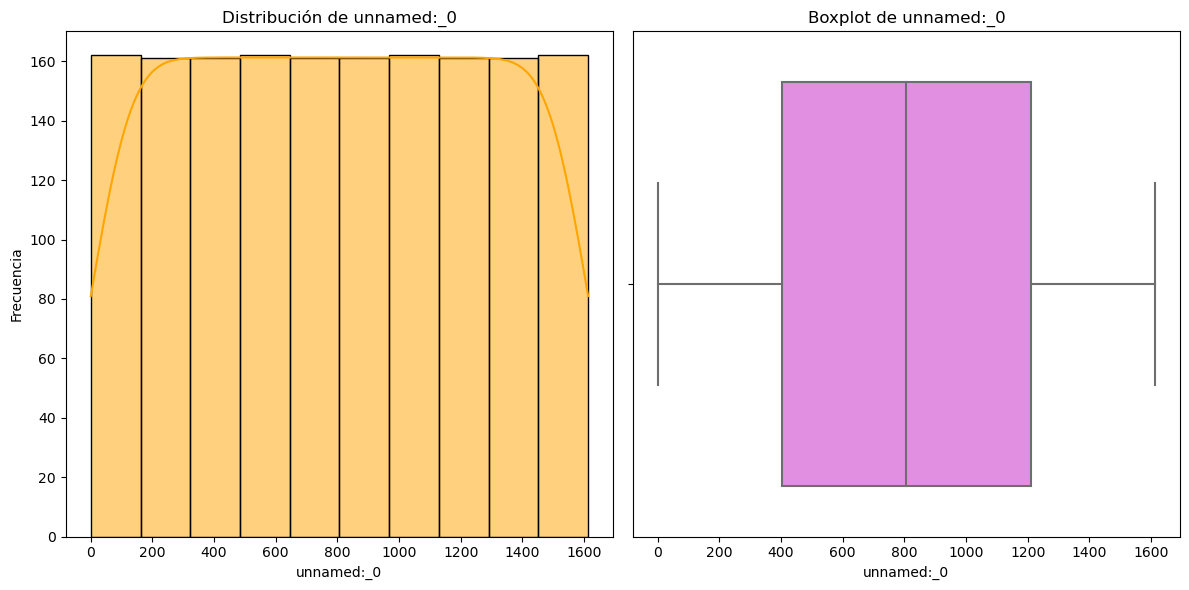

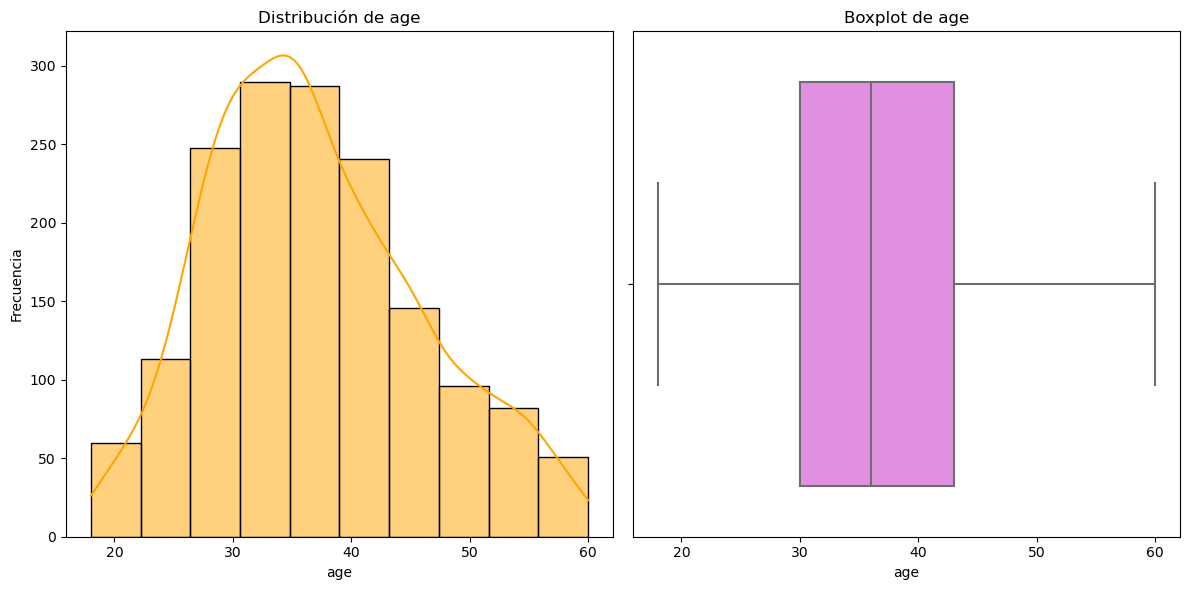

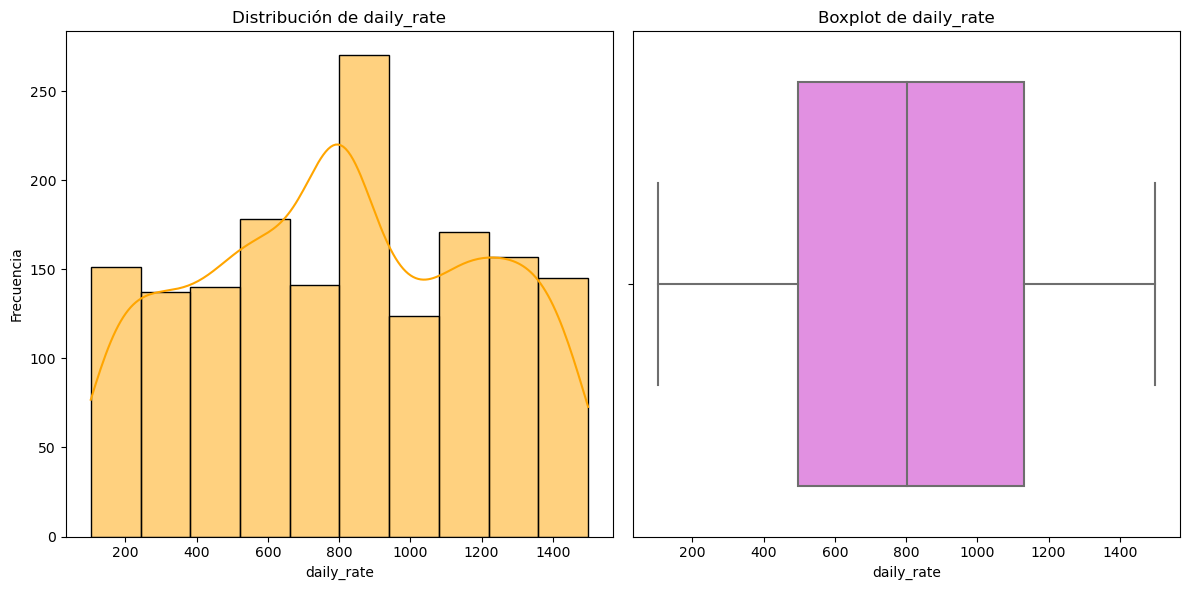

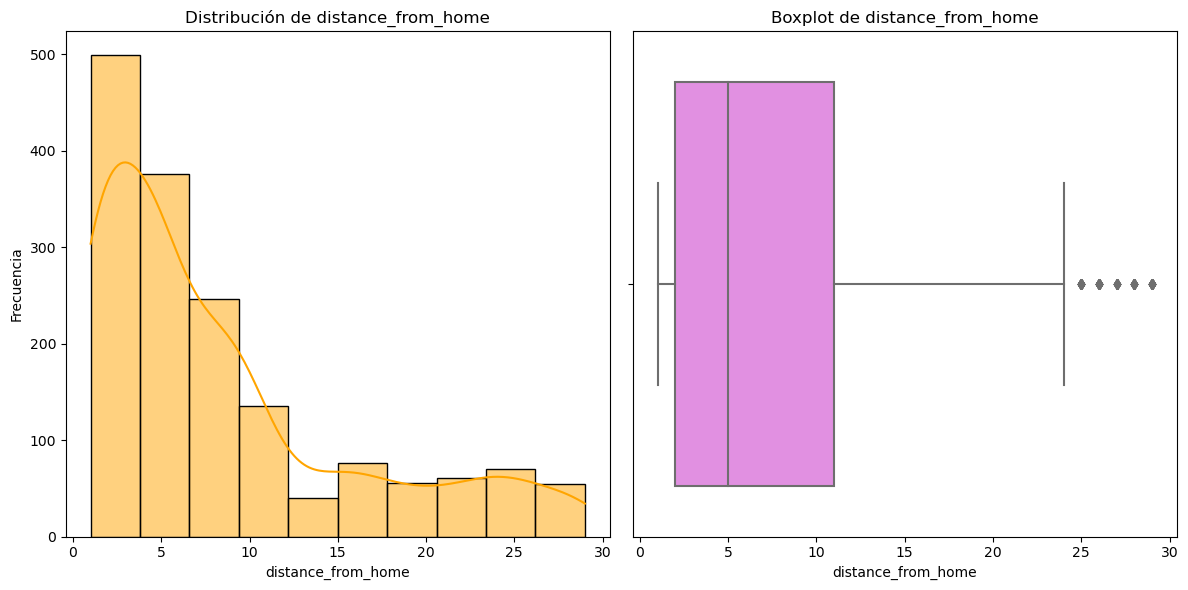

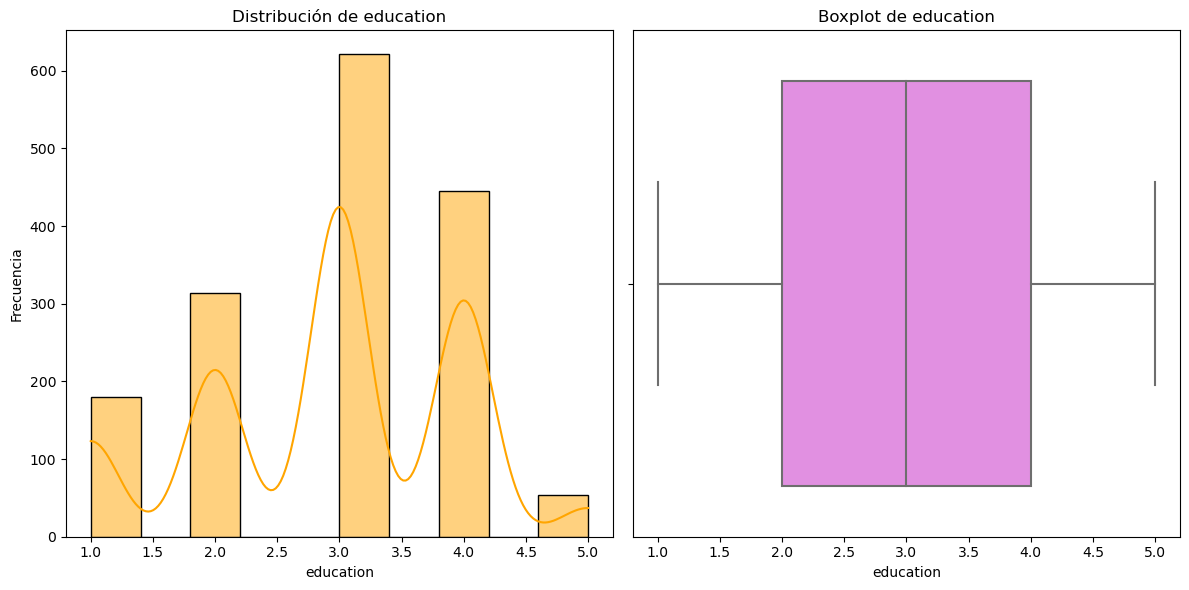

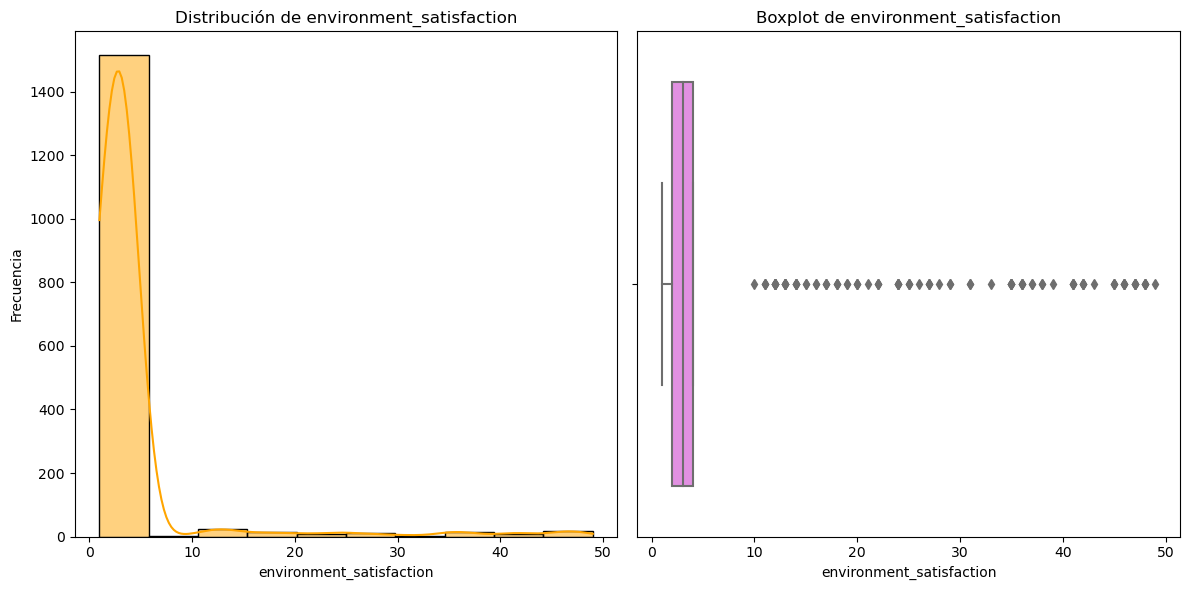

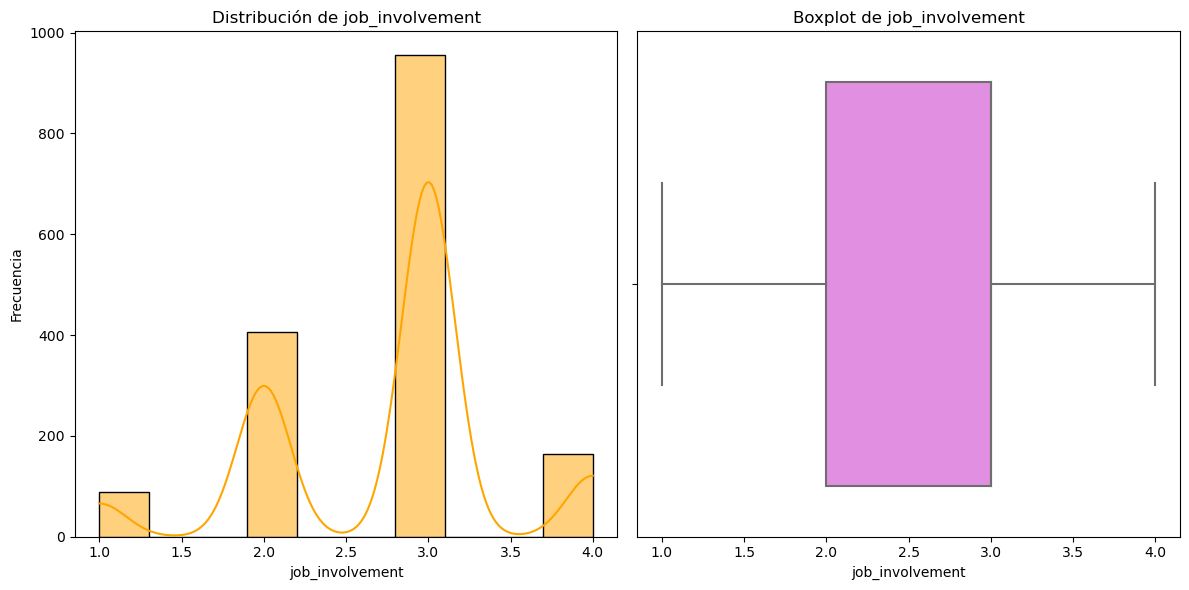

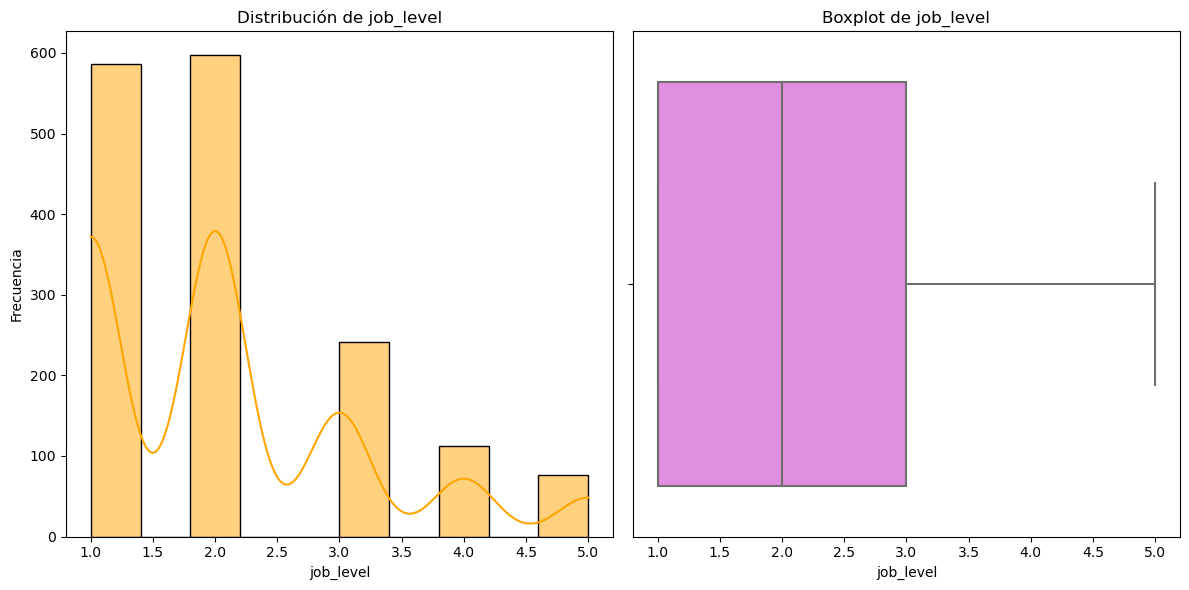

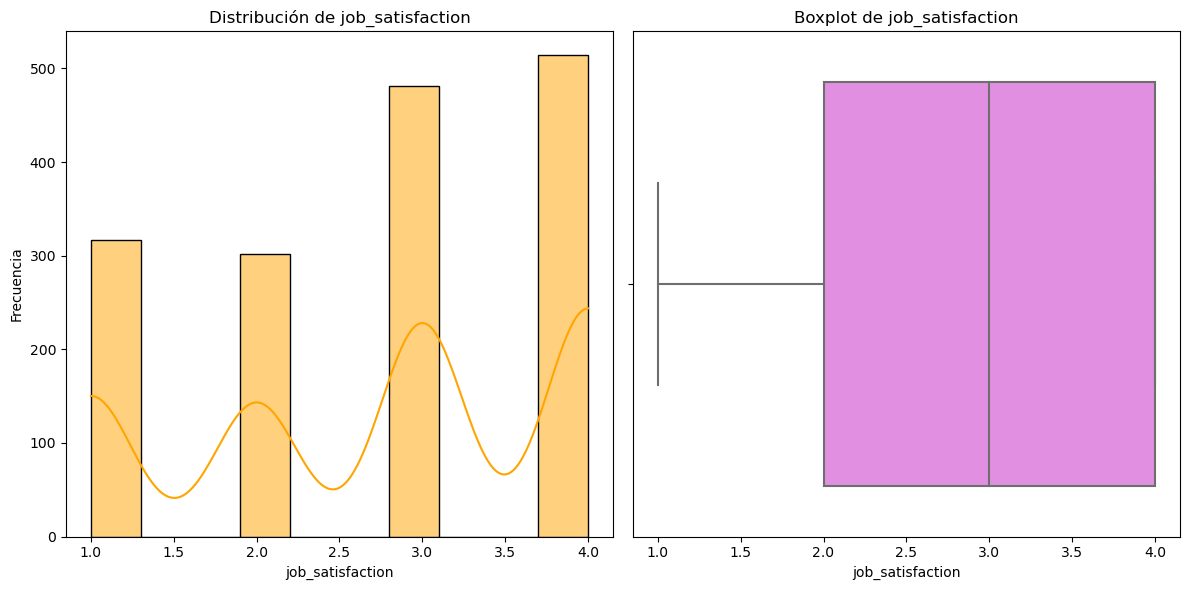

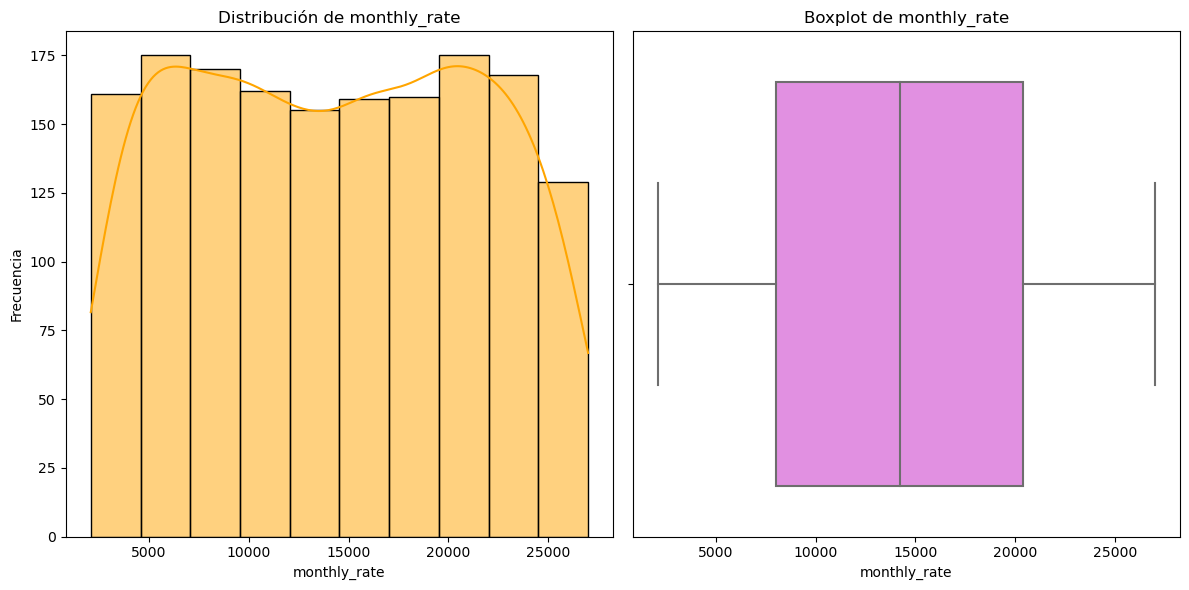

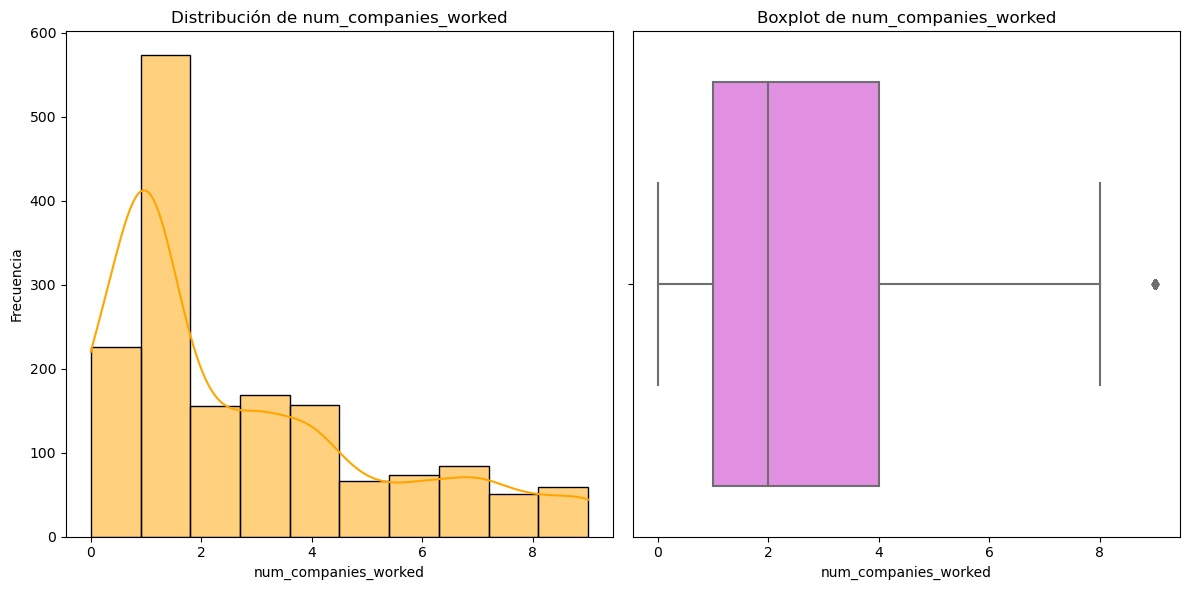

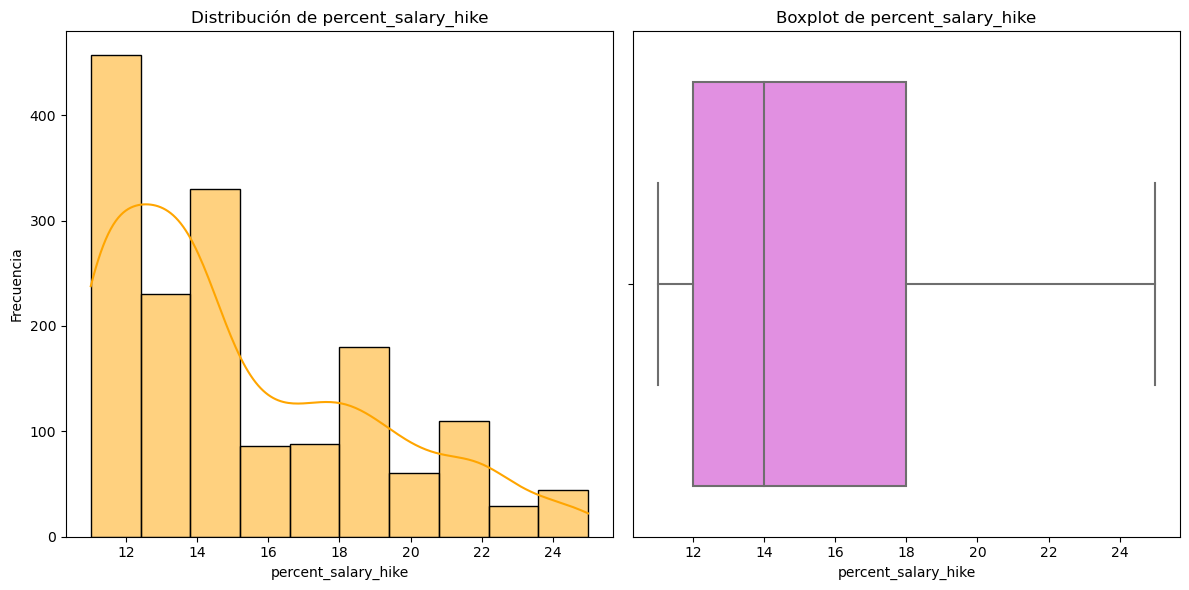

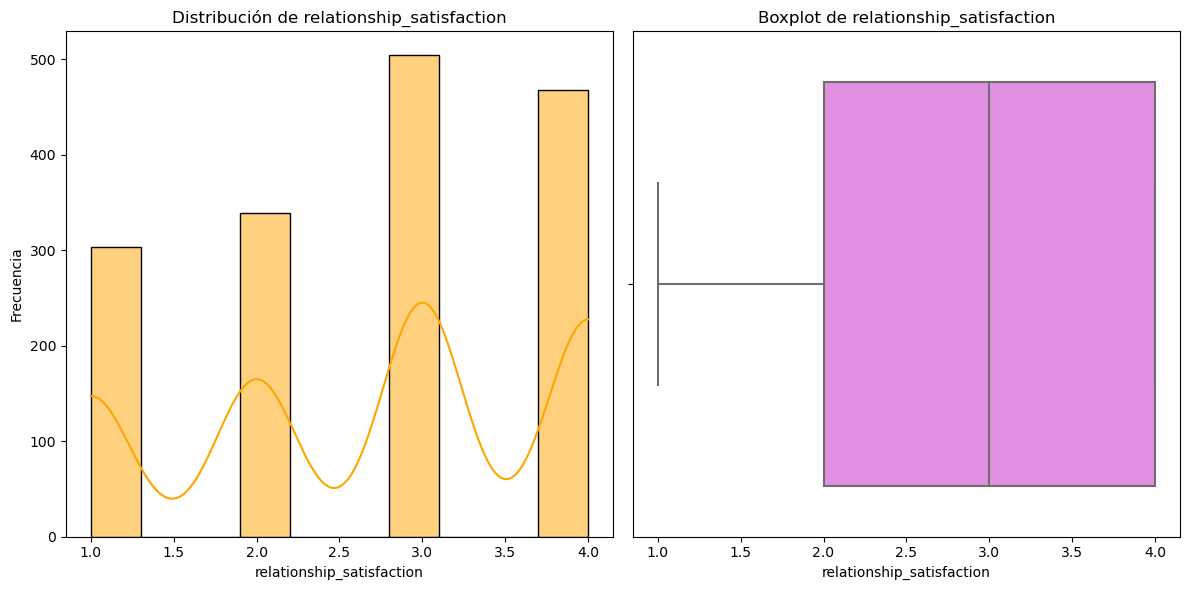

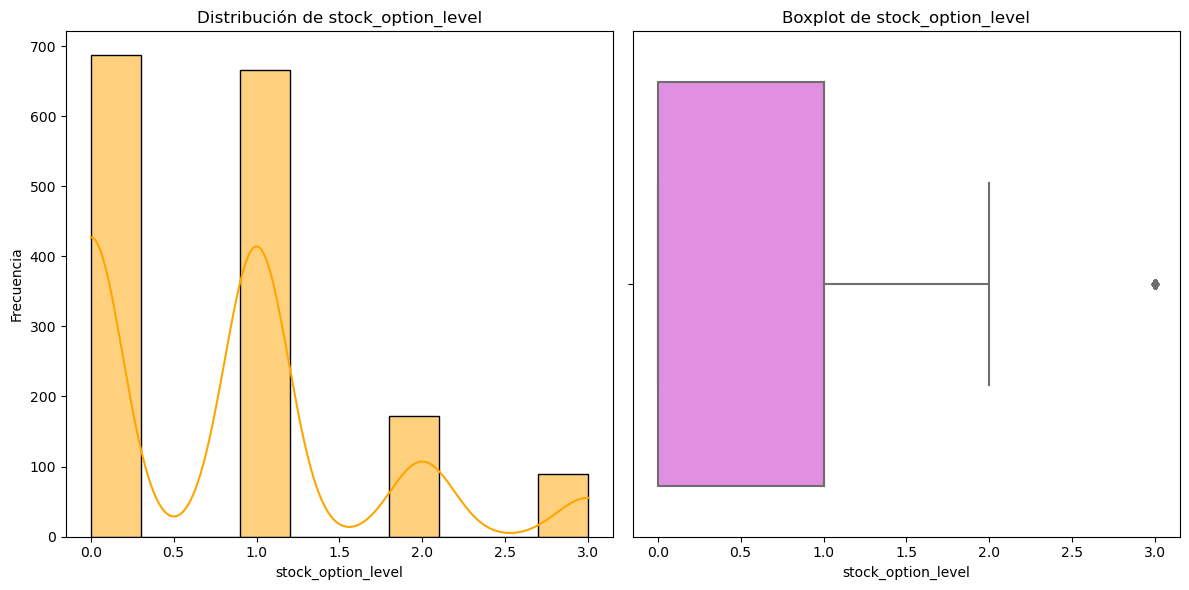

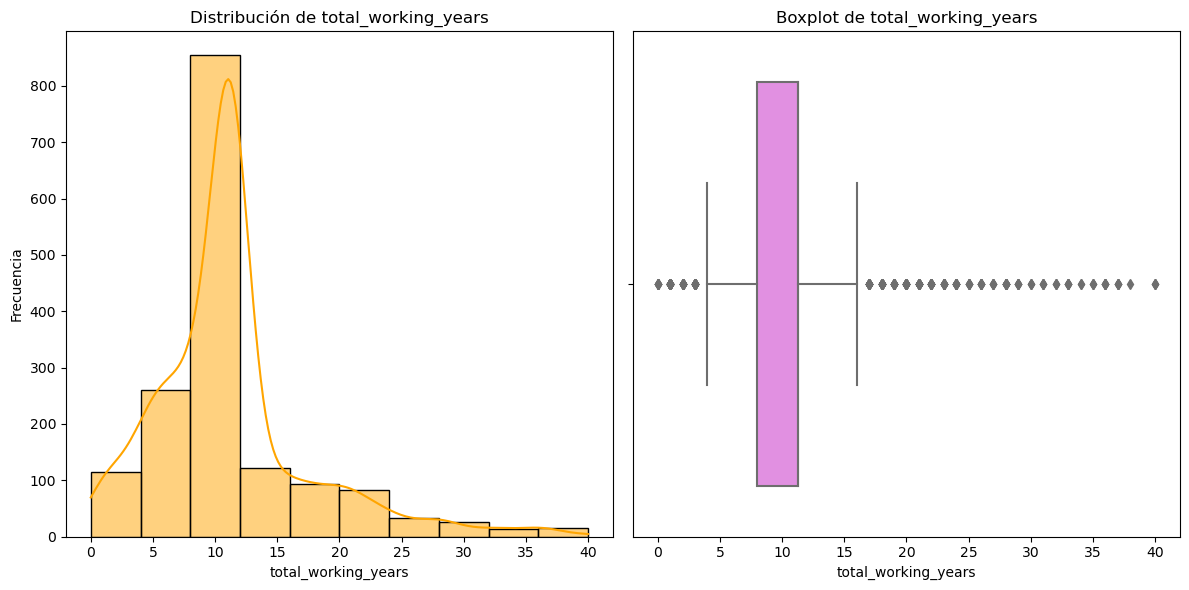

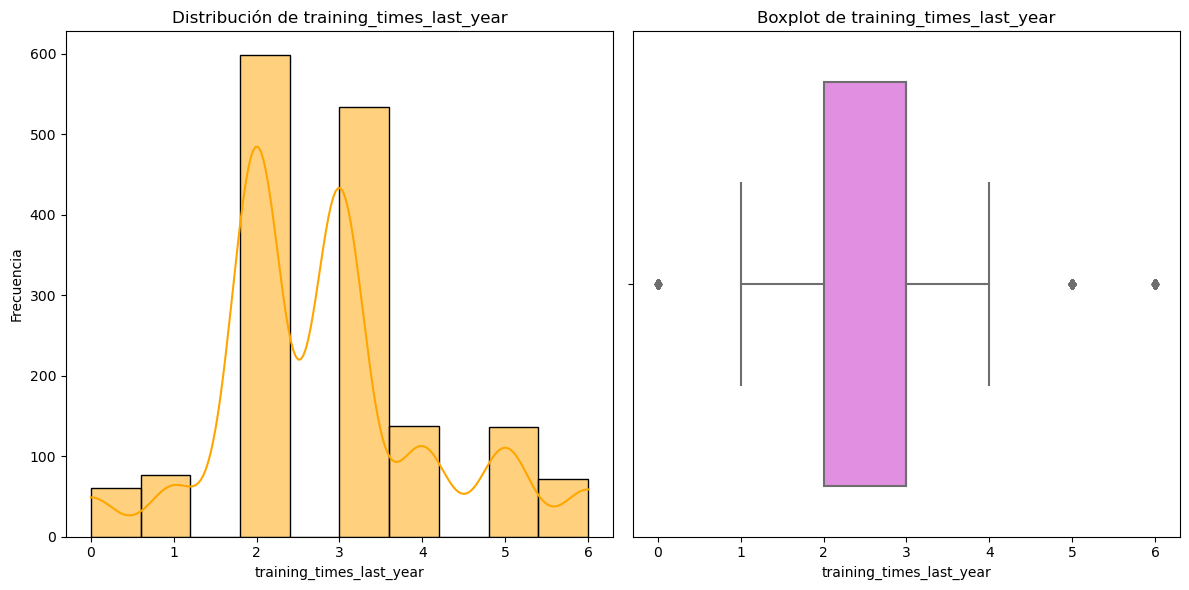

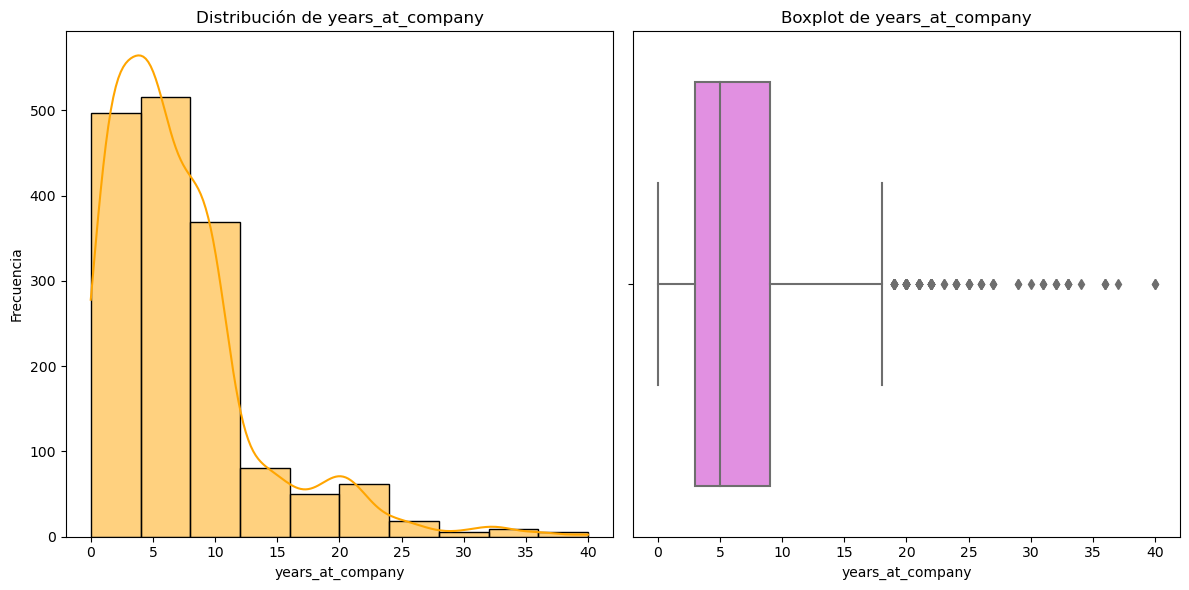

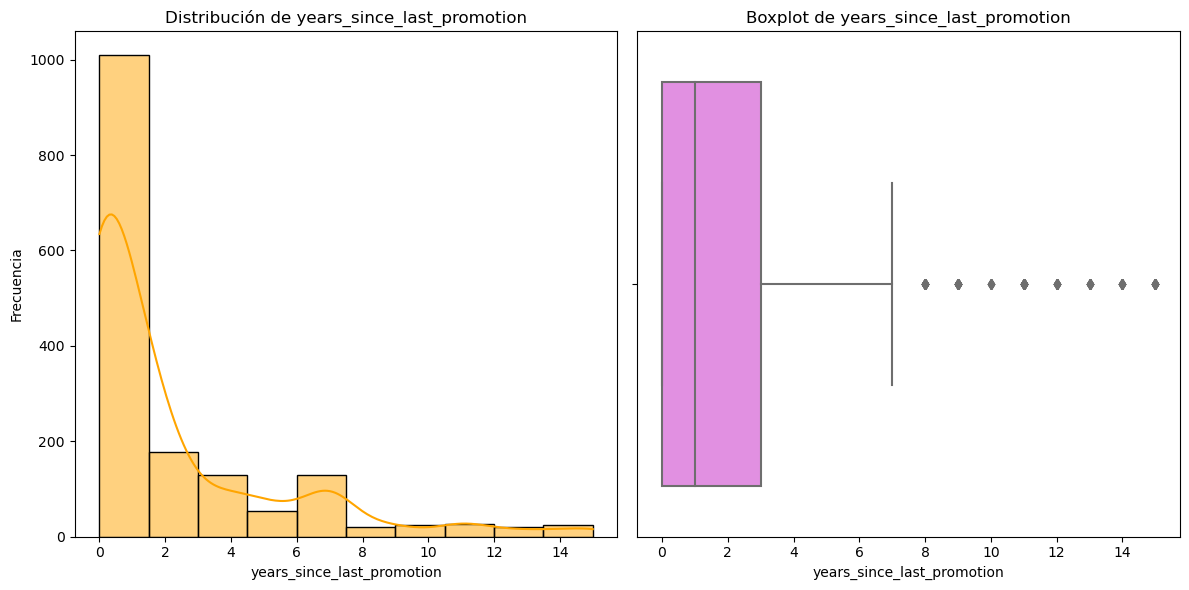

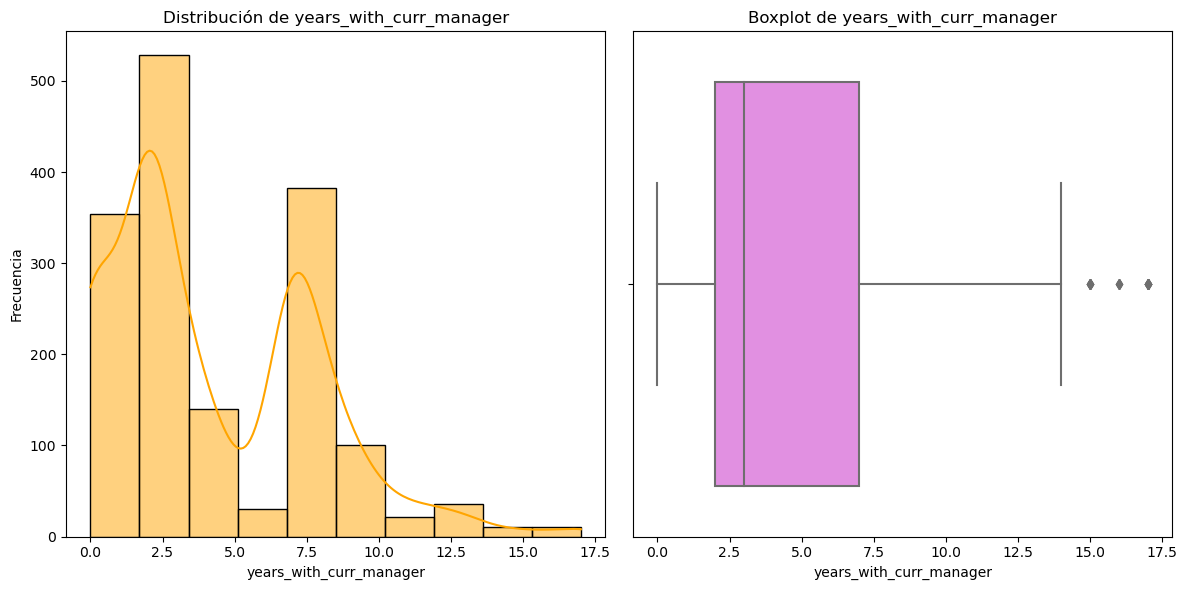

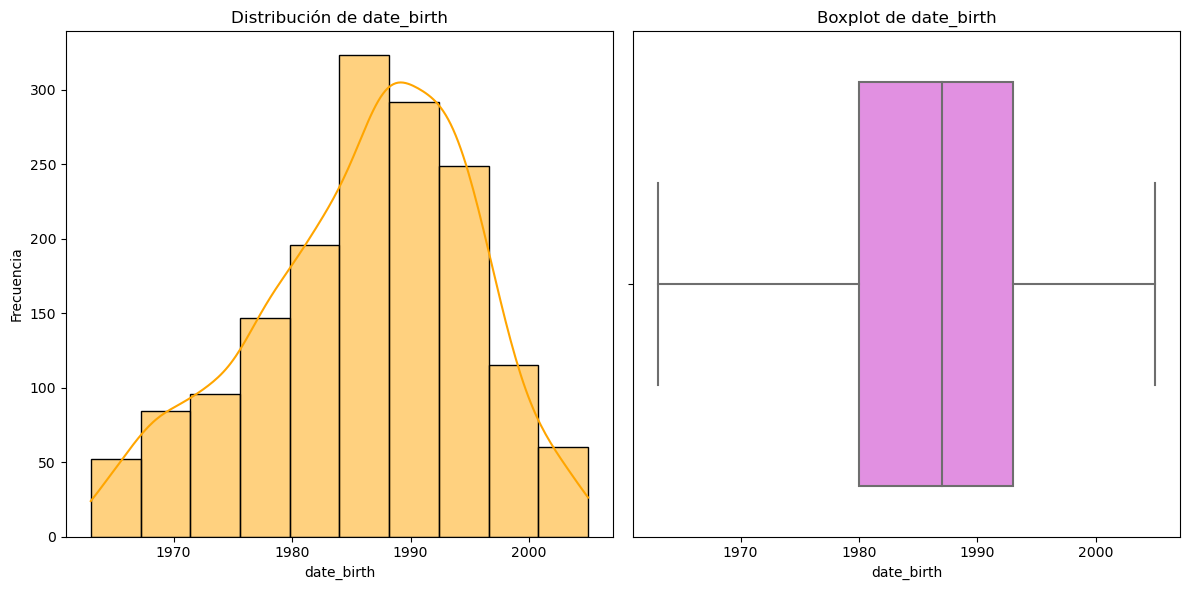

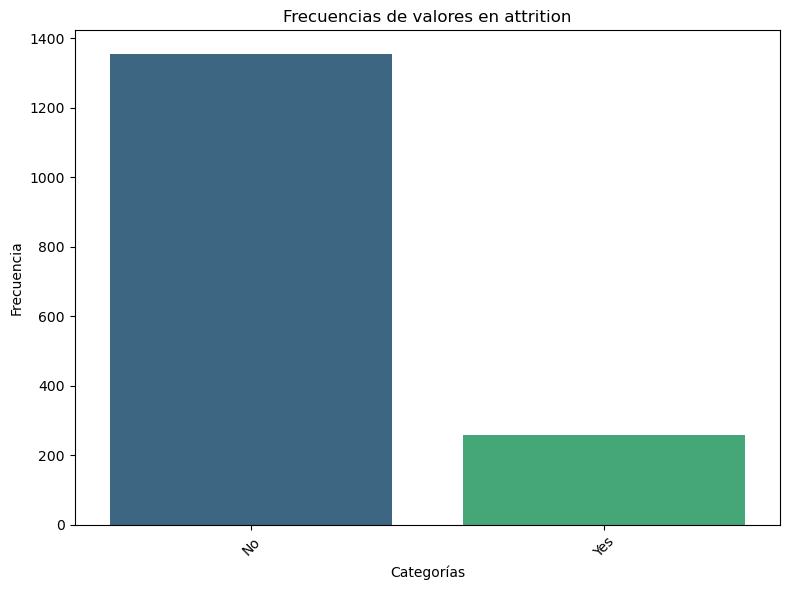

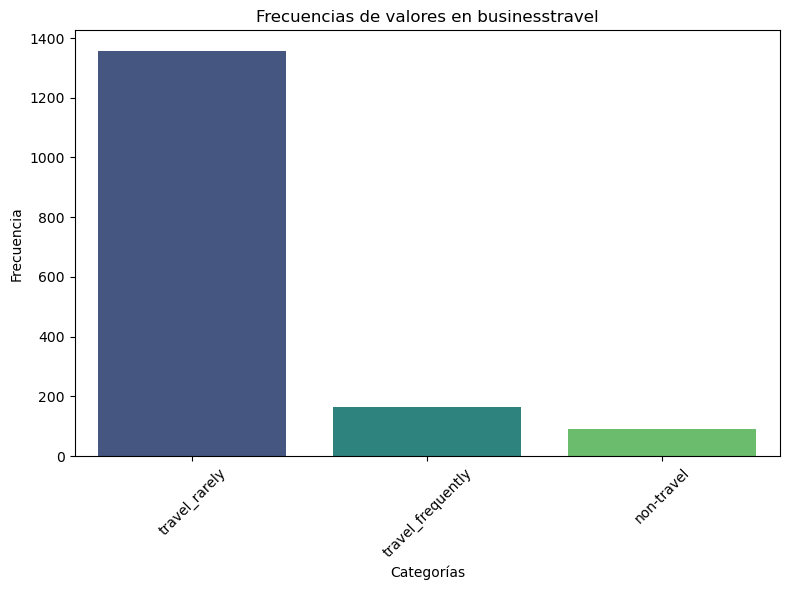

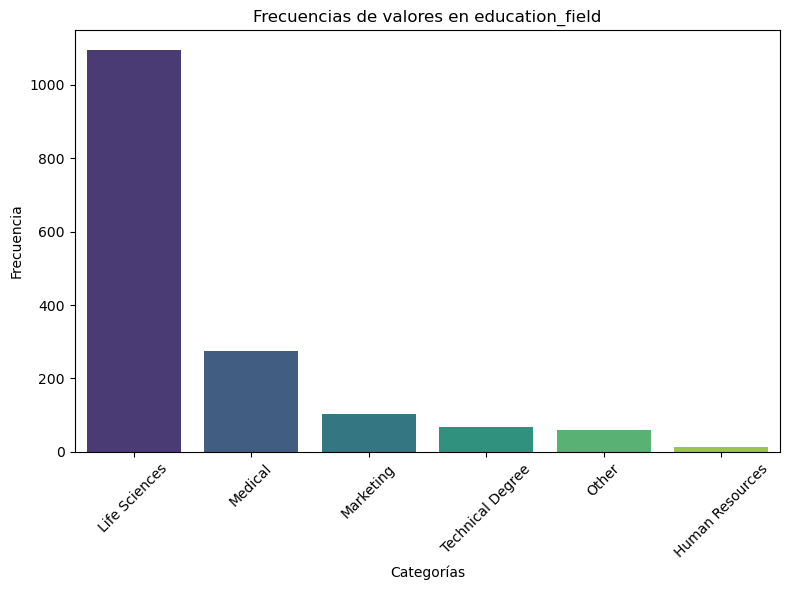

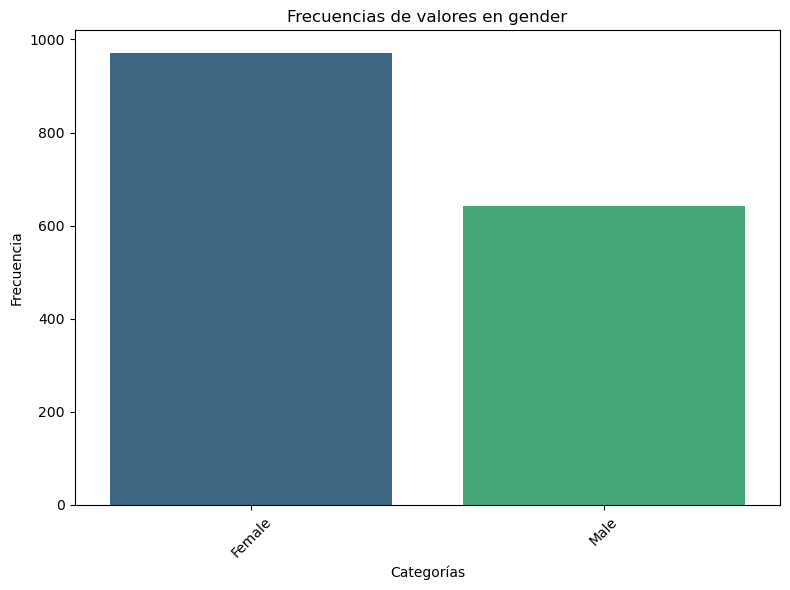

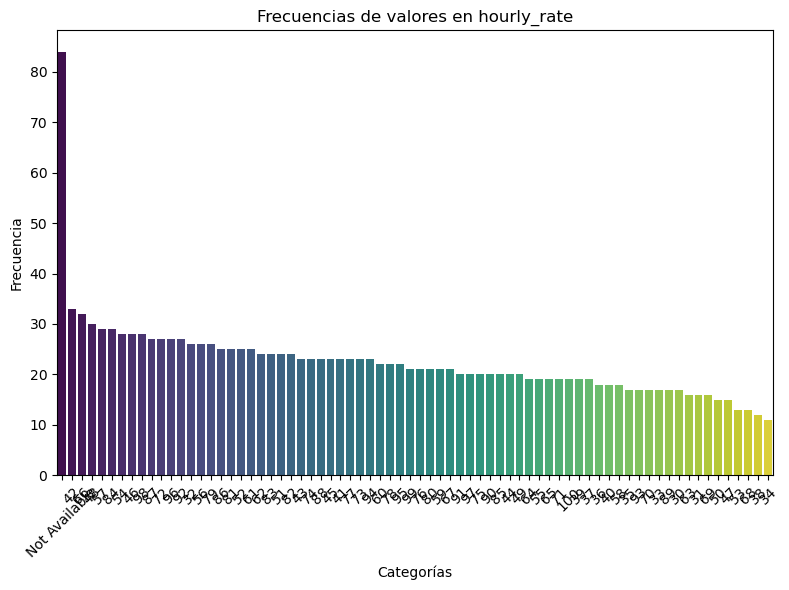

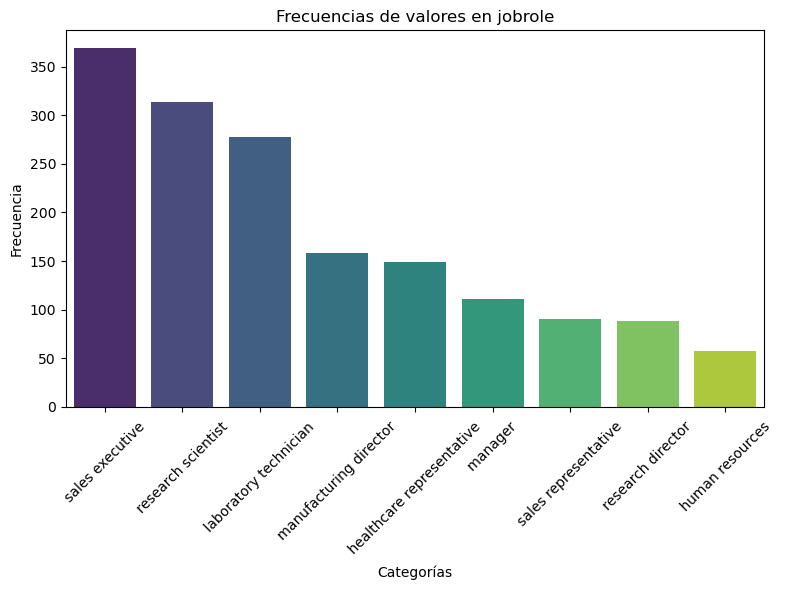

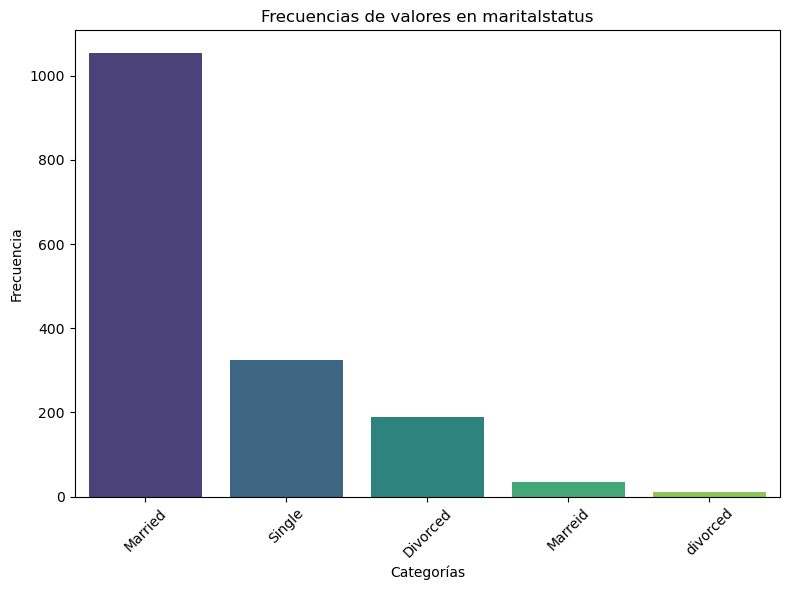

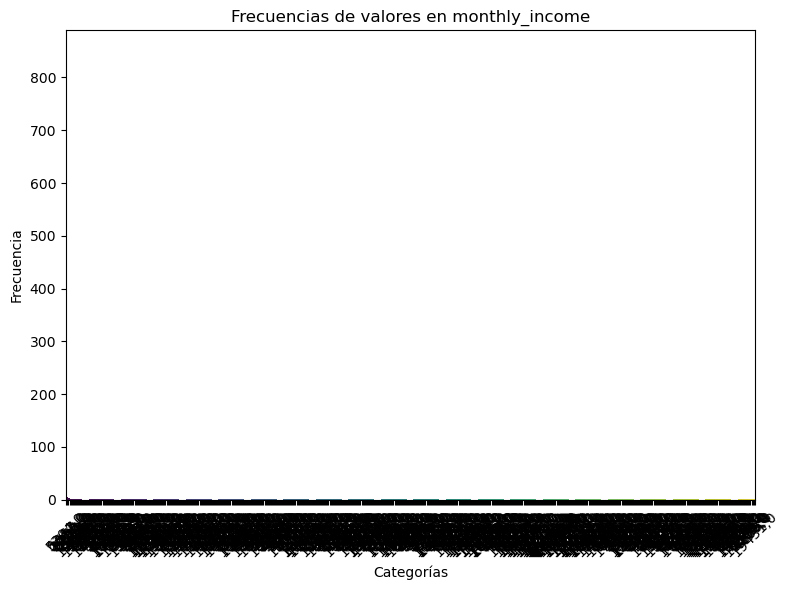

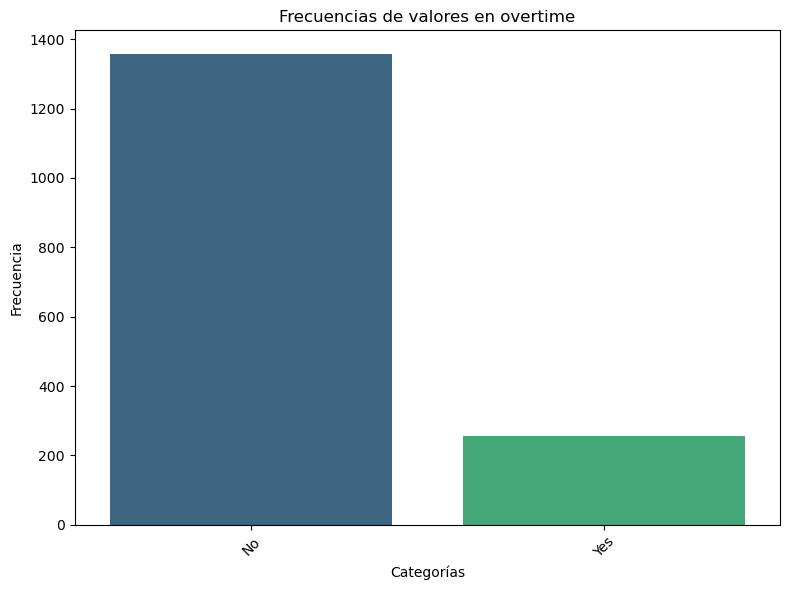

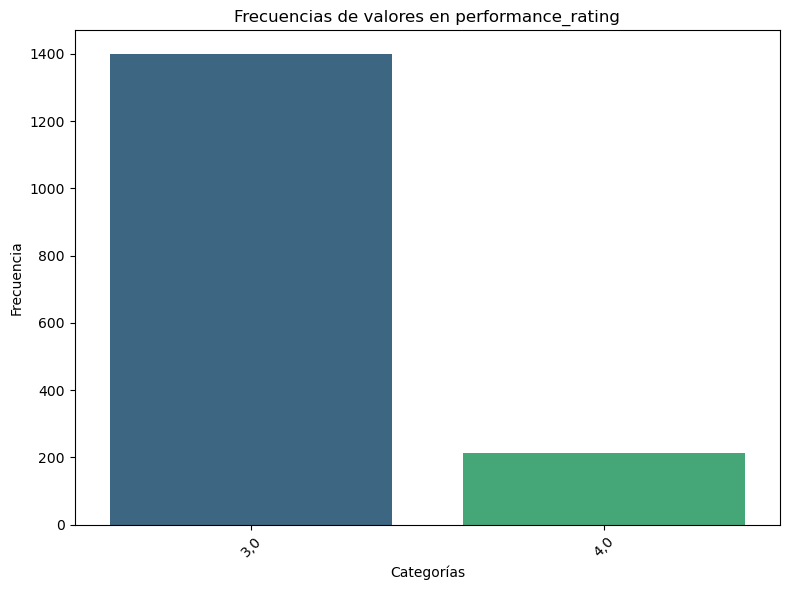

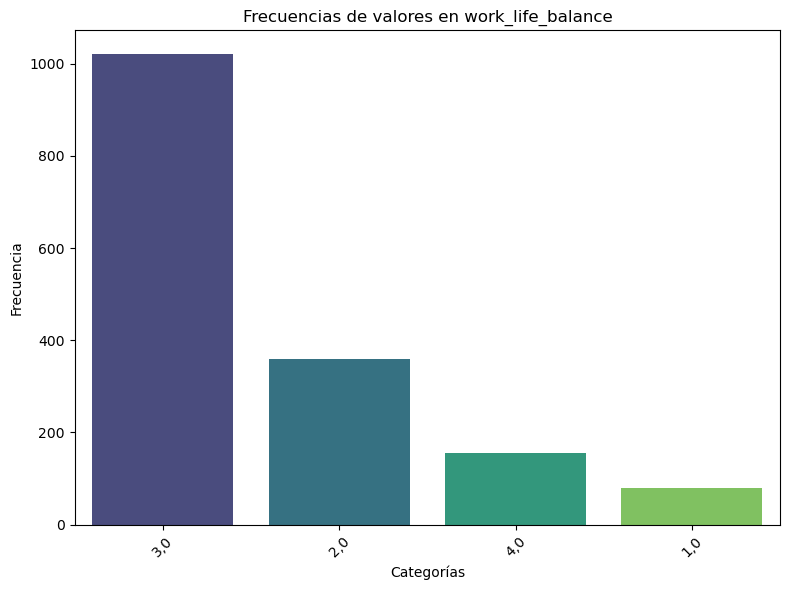

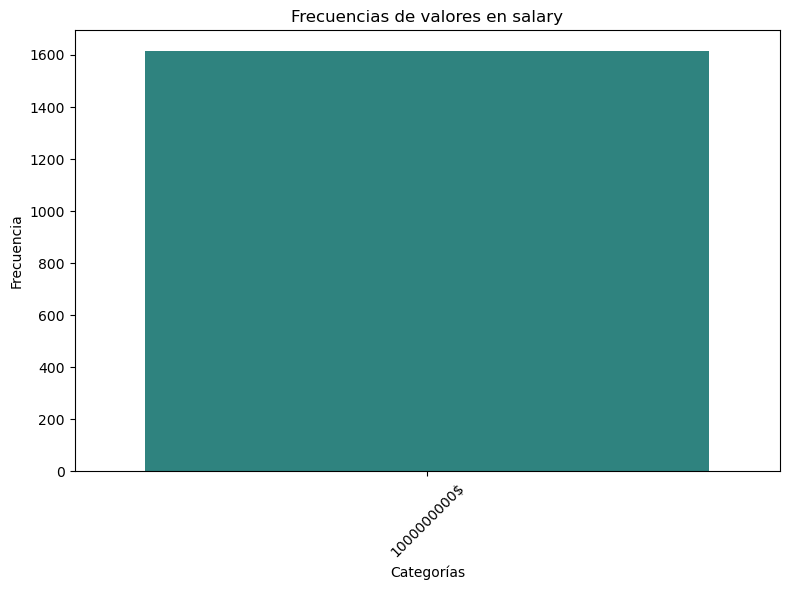

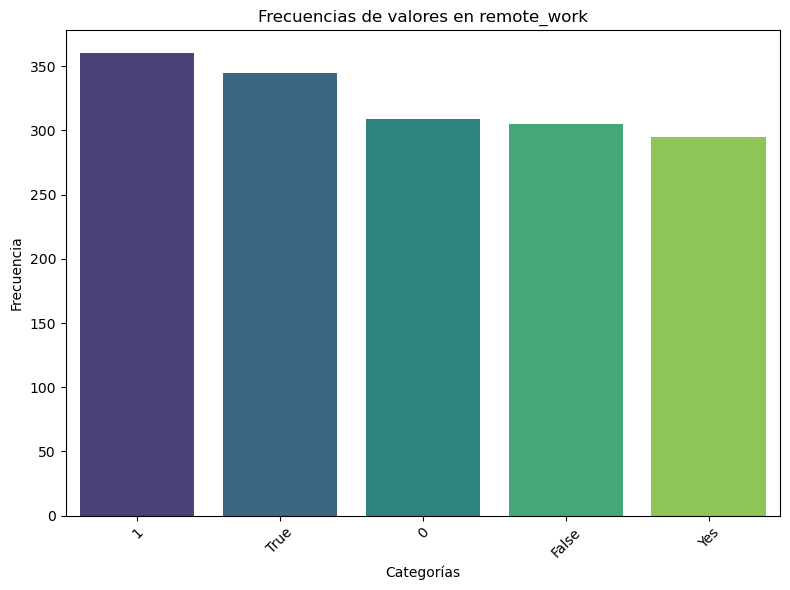

In [20]:
def visualizar_estadisticas(estadisticas):
    # Visualización de estadísticas numéricas
    for col, stats in estadisticas["numericas"].items():
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Histograma
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0], color='orange', bins=10)
        axes[0].set_title(f"Distribución de {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frecuencia")
        
        # Boxplot
        sns.boxplot(x=df[col].dropna(), ax=axes[1], color='violet')
        axes[1].set_title(f"Boxplot de {col}")
        axes[1].set_xlabel(col)
        plt.tight_layout()
        plt.show()
    
    # Visualización de estadísticas categóricas
    for col, stats in estadisticas["categoricas"].items():
        # Frecuencias directamente en el diccionario
        frecuencias = {key: val for key, val in stats.items() if key != "missing_values"}
        
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(frecuencias.keys()), y=list(frecuencias.values()), palette="viridis")
        plt.title(f"Frecuencias de valores en {col}")
        plt.xlabel("Categorías")
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    # llamamos a la funcion para visualizar los gráficos.
visualizar_estadisticas(estadisticas)


In [40]:
##Problema de A/B Testing.

# Plantear Hipótesis
H0: "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa"
H1: "No Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa"

# Muestras
##Grupo A (Control): nivel de satisfacción >= 3.
##Grupo B (Variante): nivel de satisfacción < 3.

# Creamos la columna 'Grupo' basada en el nivel de satisfacción.
df['Grupo'] = df['job_satisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

# Calcular la tasa de rotación para cada grupo
tasa_rotacion = (df.groupby('Grupo')['attrition'].apply(lambda x: (x == 'Yes').sum() / x.count()).reset_index(name='Tasa Rotación'))
print(f"\nLa tasa de rotacion es de los grupos es:")
print(tasa_rotacion.round(3))



La tasa de rotacion es de los grupos es:
  Grupo  Tasa Rotación
0     A          0.137
1     B          0.199


In [67]:
# Planteamos Hipótesis
    # HO: tasa_rotacion_A=tasa_rotacion_B
    # H1: tasa_rotacion_A != tasa_rotacion_B
# Calulamos el numero de YES Y NO
contar_A = df[df['Grupo'] == 'A']['attrition'].value_counts(normalize=True).get('Yes', 0)
contar_B = df[df['Grupo'] == 'B']['attrition'].value_counts(normalize=True).get('Yes', 0)
print(f"\nEl numero de Yes es {contar_A.round(3)} mientras que el de No es {contar_B.round(3)}")
print("------------------------------------------------------")
# Calculamos el tamaño de la muestra n.
n_A = len(df[df['Grupo'] == 'A'])
n_B = len(df[df['Grupo'] == 'B'])
print(f"\nEl tamaño de la muestra para Yes es {n_A} mientras que para No es {n_B}")
print("------------------------------------------------------")

# Elección de nivel de significancia: 0.05
alpha =0.05
print(f"\nEl nivel de significancia es: {alpha}")
print("------------------------------------------------------")




El numero de Yes es 0.137 mientras que el de No es 0.199
------------------------------------------------------

El tamaño de la muestra para Yes es 995 mientras que para No es 619
------------------------------------------------------

El nivel de significancia es: 0.05
------------------------------------------------------

Estadístico z: [-956.54635223 -594.82751694]

Valor p: [0. 0.]


In [63]:

# Contamos el número de 'Yes' en cada grupo
count_A = df[df['group'] == 'A']['Attrition'].value_counts().get('Yes', 0)
count_B = df[df['group'] == 'B']['Attrition'].value_counts().get('Yes', 0)

# Tamaños de muestra
n_A = len(df[df['group'] == 'A'])
n_B = len(df[df['group'] == 'B'])

# Realizamos la prueba z de dos proporciones
z_stat, p_val = proportions_ztest([count_A, count_B], [n_A, n_B])

print(f'Estadístico z: {z_stat}')
print(f'Valor p: {p_val}')


In [26]:
df['attrition']

,unnamed:_0,age,attrition,businesstravel,daily_rate,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,jobrole,job_satisfaction,maritalstatus,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
0,0,51.0,No,travel_rarely,684.0,6.000000,3,Life Sciences,1,Female,51,3,5,research director,3,Married,"19537,0",6462,7,No,13,"3,0",3,0,11.318934,5,"3,0",20,15,15,1972,1000000000$,Yes
1,1,52.0,No,travel_rarely,699.0,1.000000,4,Life Sciences,3,Female,65,2,5,manager,3,Married,"19999,0",5678,0,No,14,"3,0",1,1,34.000000,5,"3,0",33,11,9,1971,1000000000$,1
2,2,42.0,No,travel_rarely,532.0,4.000000,2,Technical Degree,3,Female,58,3,5,manager,4,Married,"19232,0",4933,1,No,11,"3,0",4,0,22.000000,3,"3,0",22,11,15,1981,1000000000$,1
3,3,47.0,No,travel_rarely,359.0,2.000000,4,Medical,1,Male,82,3,4,research director,3,Married,"17169,0",26703,3,No,19,"3,0",2,2,11.318934,2,"3,0",20,5,6,1976,1000000000$,False
4,4,46.0,No,travel_rarely,1319.0,3.000000,3,Technical Degree,1,Male,45,4,4,sales executive,1,Divorced,"5304,0",7739,2,No,12,"3,0",4,1,11.318934,5,"3,0",19,2,8,1977,1000000000$,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1609,36.0,Yes,travel_rarely,530.0,3.000000,1,Life Sciences,3,Female,51,2,3,sales executive,4,Married,"10325,0",5518,1,No,11,"3,0",1,1,11.318934,6,"3,0",16,3,7,1987,1000000000$,0
1610,1610,45.0,No,non-travel,805.0,4.000000,2,Life Sciences,3,Female,57,3,2,laboratory technician,2,Married,"4447,0",23163,1,No,12,"3,0",2,0,11.318934,5,"2,0",9,0,8,1978,1000000000$,1
1611,1611,39.0,No,travel_rarely,903.0,4.527261,5,Life Sciences,13,Female,41,4,3,sales executive,3,Single,"5304,0",2560,0,No,18,"3,0",4,0,9.000000,3,"3,0",8,0,7,1984,1000000000$,Yes
1612,1612,36.0,No,non-travel,1229.0,8.000000,4,Technical Degree,1,Female,84,3,2,sales executive,4,Divorced,"5304,0",25952,4,No,13,"3,0",4,2,12.000000,3,"3,0",7,0,7,1987,1000000000$,True
